In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

CONCISE = False
TEST_RATIO = 0.10

# Load the dataset
filename = 'troop_movements.csv'
data = pd.read_csv(filename)
df = pd.DataFrame(data)

# # Clean data
# df = df[df['unit_type'] != 'unknown']

if CONCISE:
    display(df.head())
else:
    display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-08 14:26:25,1,at-at,resistance,10,7,3,2,Ojom
1,2025-07-08 14:26:24,2,at-st,empire,10,6,7,1,Glee Anselm
2,2025-07-08 14:26:23,3,tie_silencer,empire,9,2,4,8,Vulpter
3,2025-07-08 14:26:22,4,stormtrooper,empire,2,7,8,3,Malastare
4,2025-07-08 14:26:21,5,stormtrooper,empire,10,3,2,7,Haruun Kal
...,...,...,...,...,...,...,...,...,...
995,2025-07-08 14:09:51,996,stormtrooper,empire,9,3,8,8,Bestine IV
996,2025-07-08 14:09:50,997,tie_fighter,empire,2,10,6,9,Umbara
997,2025-07-08 14:09:49,998,unknown,resistance,9,4,6,5,Bestine IV
998,2025-07-08 14:09:48,999,x-wing,resistance,5,7,1,4,Sullust


In [38]:
count_by_alignment = df.groupby('empire_or_resistance').size().reset_index(name='count')
display(count_by_alignment)

,empire_or_resistance,count
0,empire,490
1,resistance,510


In [39]:
count_by_homeworld = df.groupby('homeworld').size().reset_index(name='count')
if CONCISE:
    display(count_by_homeworld.head())
else:
    display(count_by_homeworld)
    print(np.sum(count_by_homeworld['count']))

,homeworld,count
0,Alderaan,26
1,Aleen Minor,17
2,Bestine IV,28
3,Cerea,17
4,Champala,22
5,Chandrila,30
6,Concord Dawn,22
7,Corellia,26
8,Dagobah,20
9,Dathomir,21


1000


In [40]:
count_by_unit_type = df.groupby('unit_type').size().reset_index(name='count')
if CONCISE:
    display(count_by_unit_type.head())
else:
    display(count_by_unit_type)
    print(np.sum(count_by_unit_type['count']))

,unit_type,count
0,at-at,113
1,at-st,121
2,resistance_soldier,130
3,stormtrooper,142
4,tie_fighter,113
5,tie_silencer,121
6,unknown,121
7,x-wing,139


1000


In [41]:
df['is_resistance'] = (df['empire_or_resistance'] == 'resistance')
if CONCISE:
    display(df.head())
else:
    display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-08 14:26:25,1,at-at,resistance,10,7,3,2,Ojom,True
1,2025-07-08 14:26:24,2,at-st,empire,10,6,7,1,Glee Anselm,False
2,2025-07-08 14:26:23,3,tie_silencer,empire,9,2,4,8,Vulpter,False
3,2025-07-08 14:26:22,4,stormtrooper,empire,2,7,8,3,Malastare,False
4,2025-07-08 14:26:21,5,stormtrooper,empire,10,3,2,7,Haruun Kal,False
...,...,...,...,...,...,...,...,...,...,...
995,2025-07-08 14:09:51,996,stormtrooper,empire,9,3,8,8,Bestine IV,False
996,2025-07-08 14:09:50,997,tie_fighter,empire,2,10,6,9,Umbara,False
997,2025-07-08 14:09:49,998,unknown,resistance,9,4,6,5,Bestine IV,True
998,2025-07-08 14:09:48,999,x-wing,resistance,5,7,1,4,Sullust,True


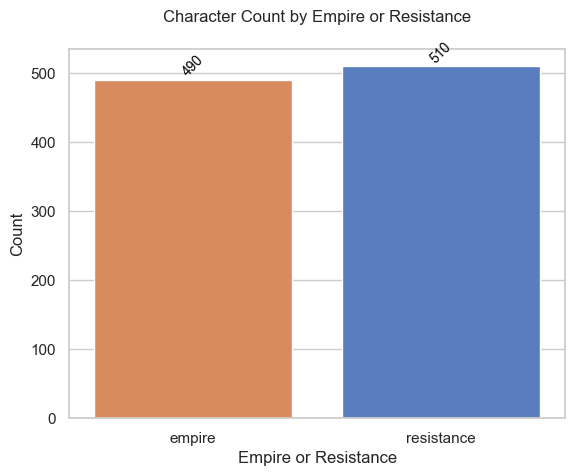

In [42]:
sns.set_theme(style="whitegrid")
sns_palette = sns.color_palette('muted')

ax =  sns.barplot(x="empire_or_resistance", y="count", palette=[sns_palette[1], sns_palette[0]],
                  hue="empire_or_resistance", data=count_by_alignment)
plt.title("Character Count by Empire or Resistance", y=1.05)
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                rotation=45,
                xytext=(0, 10), textcoords='offset points')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = df[['unit_type', 'homeworld']]
X_enc = pd.get_dummies(X)
y = df['is_resistance']

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=TEST_RATIO, random_state=42)

# Train the classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predict alignment for test set
y_pred = clf.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.58


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_10512\3065979516.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


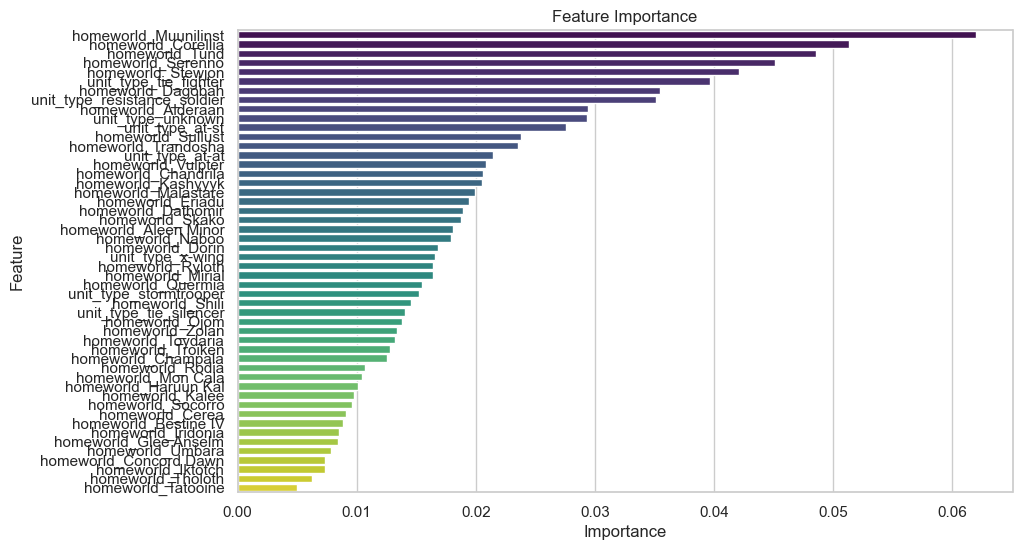

Model saved as trained_model.pkl


In [44]:
# Convert categorical features to numeric using pd.get_dummies
X_enc = pd.get_dummies(X)

# Create a bar plot that shows feature importance

importances = clf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature' : X_enc.columns,
    'Importance' : importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Save the model as trained_model.pkl
import pickle
model_filename = 'trained_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(clf, model_file)

print(f"Model saved as {model_filename}")